In [1]:
import numpy as np
import os 
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.layers import BatchNormalization, Activation
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import joblib
import cv2 as cv
import matplotlib.pyplot as plt

# Lectura de imágenes y etiquetas

In [5]:
data = []
labels = []
cur_path = os.getcwd() 
train_path = os.path.join(cur_path,'train_data')

classes = len(os.listdir(train_path))

for c in os.listdir(train_path): 
  path = os. path.join(train_path, c, 'augmented_data')
  images = os.listdir(path) 
  for a in images: 
    try: 
        image = Image.open(path + '\\' + a)
        image = image.resize((64,64)) 
        image = np.array(image) 
        data.append(image) 
        labels.append(c) 
    except: 
        print("Error loading image") 
data = np.array(data)
labels = np.array(labels)


In [6]:
# Codificar etiquetas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

print(data.shape, labels.shape)

(17991, 64, 64) (17991,)


In [7]:
# Separar datos de entrenamiento y prueba
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=classes)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

(14392, 64, 64) (3599, 64, 64) (14392,) (3599,)


# Modelo y red neuronal

In [8]:
# Modelo de red neuronal convolucional
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(64, 64, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=(5, 5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(classes, activation='softmax'))

# Compilar modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
# Entrenar modelo
trained = model.fit(X_t1, y_t1, batch_size=64, epochs=10, validation_data=(X_t2, y_t2))

Epoch 1/10
225/225 [==============================] - 149s 664ms/step - loss: 0.2778 - accuracy: 0.9113 - val_loss: 0.3438 - val_accuracy: 0.8802
Epoch 2/10
225/225 [==============================] - 160s 713ms/step - loss: 0.2310 - accuracy: 0.9304 - val_loss: 0.3140 - val_accuracy: 0.8989
Epoch 3/10
225/225 [==============================] - 152s 673ms/step - loss: 0.1923 - accuracy: 0.9417 - val_loss: 0.2666 - val_accuracy: 0.9083
Epoch 4/10
225/225 [==============================] - 153s 680ms/step - loss: 0.1731 - accuracy: 0.9464 - val_loss: 0.2971 - val_accuracy: 0.9089
Epoch 5/10
225/225 [==============================] - 151s 670ms/step - loss: 0.1521 - accuracy: 0.9535 - val_loss: 0.2429 - val_accuracy: 0.9189
Epoch 6/10
225/225 [==============================] - 157s 698ms/step - loss: 0.1372 - accuracy: 0.9584 - val_loss: 0.2926 - val_accuracy: 0.9061
Epoch 7/10
225/225 [==============================] - 151s 673ms/step - loss: 0.1180 - accuracy: 0.9620 - val_loss: 0.1994 -

In [11]:
# Guardar modelo
model.save("../traffic_signs.h5")

In [12]:


# Guardar label encoder
joblib.dump(label_encoder, '../script/label_encoder.pkl')

['../script/label_encoder.pkl']

# Ejemplo

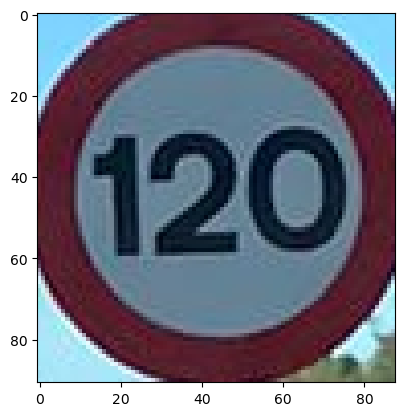

In [13]:
img = cv.imread('../script/images2/120.jpg',cv.IMREAD_COLOR)

h_inf_1=170
h_sup_1=180
h_inf_2=0
h_sup_2=5

lower_red_1 = np.array([h_inf_1,50,50])
upper_red_1 = np.array([h_sup_1,255,255])
lower_red_2 = np.array([h_inf_2,50,50])
upper_red_2 = np.array([h_sup_2,255,255])

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
red_mask_1 = cv.inRange(hsv, lower_red_1, upper_red_1)
red_mask_2 = cv.inRange(hsv, lower_red_2, upper_red_2)

red_mask = red_mask_1+red_mask_2

img_rojo = cv.bitwise_and(img,img, mask= red_mask)

gray = cv.cvtColor(img_rojo, cv.COLOR_BGR2GRAY)
binary = cv.threshold(gray, 0, 255, cv.THRESH_BINARY)[1]

forms = cv.erode(binary, np.ones((3,3),np.uint8), iterations = 1)

contours = cv.findContours(forms, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
biggest_contour = max(contours[0], key=cv.contourArea)

img_copy = img.copy()
x,y,w,h = cv.boundingRect(biggest_contour)
cv.drawContours(img_copy, biggest_contour, -1, (0,255,0), 3)
cv.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),2)

cropped = img[y:y+h, x:x+w]

plt.imshow(cv.cvtColor(cropped,cv.COLOR_BGR2RGB))

1/1 [==============================] - 1s 517ms/step
Predicted class: velocidad_120
Class probability: 0.9867638


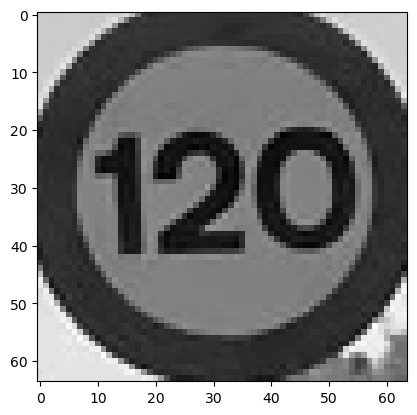

In [14]:
# Preprocesar imagen
image = cv.resize(cropped, (64,64))
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image = np.array(image)
image = image.reshape(1,64,64,1)

# Visualizar imagen
plt.imshow(image.reshape(64,64), cmap='gray')

# Predecir imagen
predictions = model.predict(image)

predicted_class_index = np.argmax(predictions)
class_probability = np.max(predictions)
predicted_class_label = label_encoder.inverse_transform([predicted_class_index])

# Visualizar predicción
print("Predicted class:", predicted_class_label[0])
print("Class probability:", class_probability)